<a href="https://colab.research.google.com/github/AngelB26/Stock_Price_Prediction_LSTM/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINOR PROJECT**

---
Data Science Internship - October 2023


---


**Stock Price Prediction**


---


Instructions:

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

To Download the dataset into CSV visit this website- https://cloudconvert.com/xls-to-csv


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the dataset
stock=pd.read_csv('/content/1729258-1613615-Stock_Price_data_set_(1) (1).csv')

In [4]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
stock.shape

(1009, 7)

In [9]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
#checking missing values
stock.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
#set the date from string to date format
stock['Date']=pd.to_datetime(stock['Date'])

In [13]:
#setting the date as index

stock.set_index('Date',inplace=True)

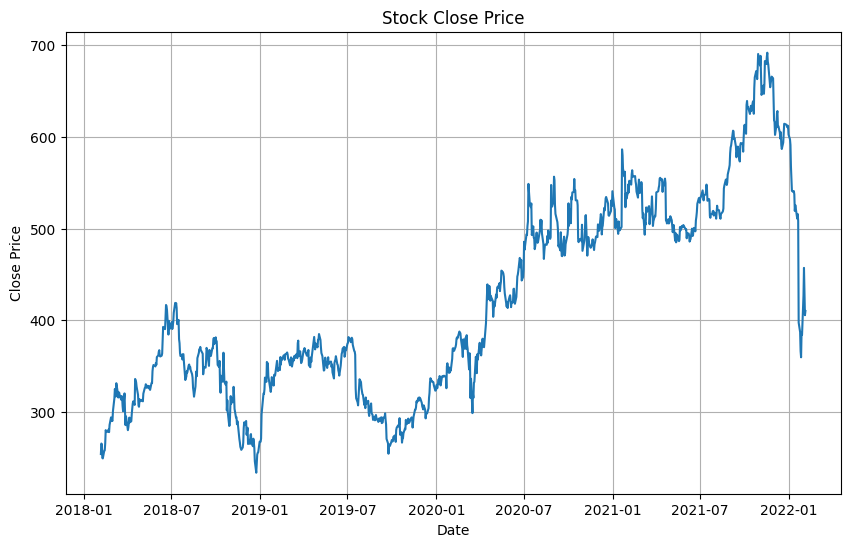

In [14]:
# Plot the close data
plt.figure(figsize=(10, 6))
plt.plot(stock.index, stock["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Close Price")
plt.grid(True)
plt.show()

In [17]:
import math

In [25]:
#split the training_data and testing_data
stock_data=stock.filter(['Close'])
stock_df=stock_data.values
train_df=math.ceil(len(stock_df)*0.8)
train_df

808

In [31]:
#scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_df_scaled=scaler.fit_transform(stock_df)
stock_df_scaled

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [36]:
# Create a data structure with 60 timesteps and 1 output

X_train,y_train=[],[]
#append past 60 days of data
for i in range(60,train_df):
  X_train.append(stock_df_scaled[i-60:i,0])#append not including 60 days
  y_train.append(stock_df_scaled[i,0])
#converting to numpy array
X_train,y_train=np.array(X_train),np.array(y_train)


In [37]:
# re-shaping the X_train from two dimension to three dimensional

X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_train.shape

(748, 60, 1)

**LSTM Model**

In [38]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
#build the LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [39]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [40]:
#train the model
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 10s 116ms/step - loss: 0.0202
Epoch 2/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0053
Epoch 3/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0053
Epoch 4/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0046
Epoch 5/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0040
Epoch 6/100
24/24 [==============================] - 2s 87ms/step - loss: 0.0043
Epoch 7/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0042
Epoch 8/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0043
Epoch 9/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0045
Epoch 10/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0038
Epoch 11/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0035
Epoch 12/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0038
Epoch 13/100
24/24 [==

In [43]:
test_data=stock_df_scaled[train_df - 60:, :]
X_test =[]
y_test = stock_df[train_df:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [46]:
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [47]:
X_test.shape

(201, 60, 1)

In [48]:
#predict the model

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 2s 20ms/step


In [49]:
#rmse

rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("The root mean squared error is:", rmse)


The root mean squared error is: 18.03138443855735


<ipython-input-59-0d3a27e3aa5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


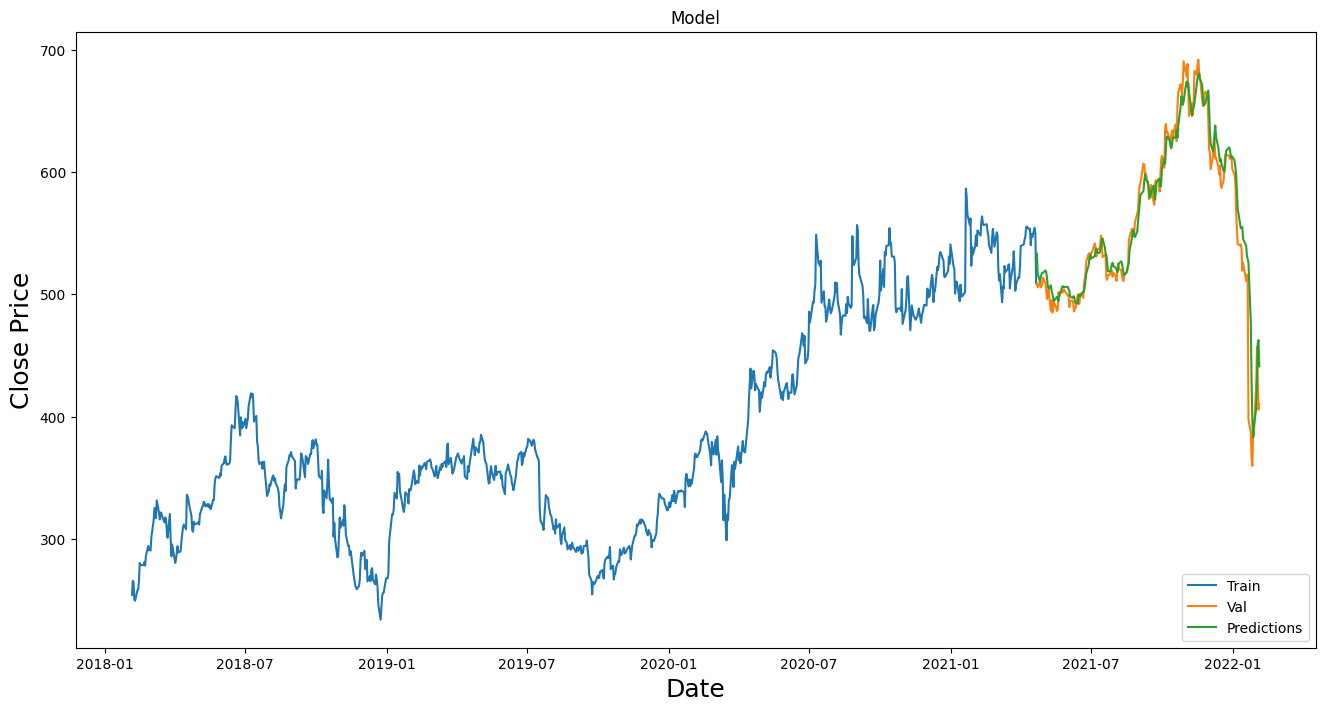

In [59]:
#plot the model
train = stock_data[:train_df]
valid = stock_data[train_df:]
valid['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

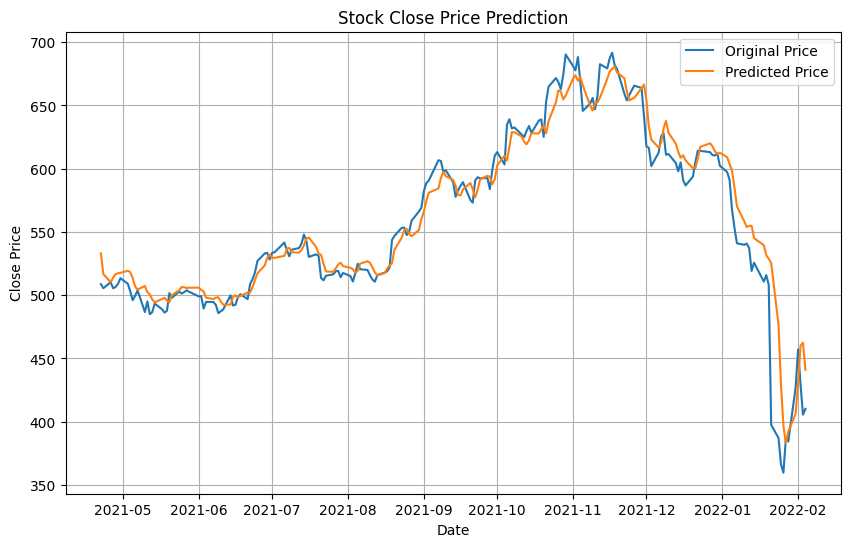

In [57]:
#Evaluate the model

plt.figure(figsize=(10, 6))
plt.plot(stock.index[train_df:], stock["Close"][train_df:], label="Original Price")
plt.plot(stock.index[train_df:], predictions, label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Close Price Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [61]:
valid.head()

,Close,predictions
Date,,
2021-04-22,508.779999,533.087341
2021-04-23,505.549988,516.702026
2021-04-26,510.299988,510.366241
2021-04-27,505.549988,513.833130
2021-04-28,506.519989,516.675232


In [62]:
valid.tail()

,Close,predictions
Date,,
2022-01-31,427.140015,406.368286
2022-02-01,457.130005,430.789337
2022-02-02,429.480011,460.072632
2022-02-03,405.600006,462.514435
2022-02-04,410.170013,440.993195
